In [1]:
# libraries 
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

from matplotlib import rcParams
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix 
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# !pip install xgboost

In [3]:
# load data
df = pd.read_csv('/Users/lilyliang/Downloads/447 notes/dataset.csv')
df.head()

# check if there are duplicate rows 
print(df.duplicated().sum())

print("before:",df.shape)
df = df.drop_duplicates()

print("after:",df.shape)
print(df.duplicated().sum())

1
before: (303, 14)
after: (302, 14)
0


In [4]:
selected_features = ['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

X = df[selected_features] # features

y = df['target'] # target values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

### Train base models

In [5]:
def evaluate_models(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize models
    models = {
        'Logistic Regression': LogisticRegression(),
        'Decision Trees': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'XGBoost': XGBClassifier(),
        'SVM': SVC(),
        'KNN': KNeighborsClassifier(),
        'Naive Bayes': GaussianNB()
    }
    
    # Dictionary to store results
    results = {}
    
    # Train and evaluate each model
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on training and testing sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate training and testing accuracy
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        # Store results in the dictionary
        results[name] = {'Training Accuracy': train_accuracy, 'Testing Accuracy': test_accuracy}
    
    return results

# Usage example:
# Assuming X and y are your features and target variable
results = evaluate_models(X, y)
print(results)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': {'Training Accuracy': 0.8755186721991701, 'Testing Accuracy': 0.8524590163934426}, 'Decision Trees': {'Training Accuracy': 1.0, 'Testing Accuracy': 0.8032786885245902}, 'Random Forest': {'Training Accuracy': 1.0, 'Testing Accuracy': 0.8524590163934426}, 'XGBoost': {'Training Accuracy': 1.0, 'Testing Accuracy': 0.8360655737704918}, 'SVM': {'Training Accuracy': 0.6514522821576764, 'Testing Accuracy': 0.7049180327868853}, 'KNN': {'Training Accuracy': 0.7593360995850622, 'Testing Accuracy': 0.6557377049180327}, 'Naive Bayes': {'Training Accuracy': 0.8174273858921162, 'Testing Accuracy': 0.8852459016393442}}


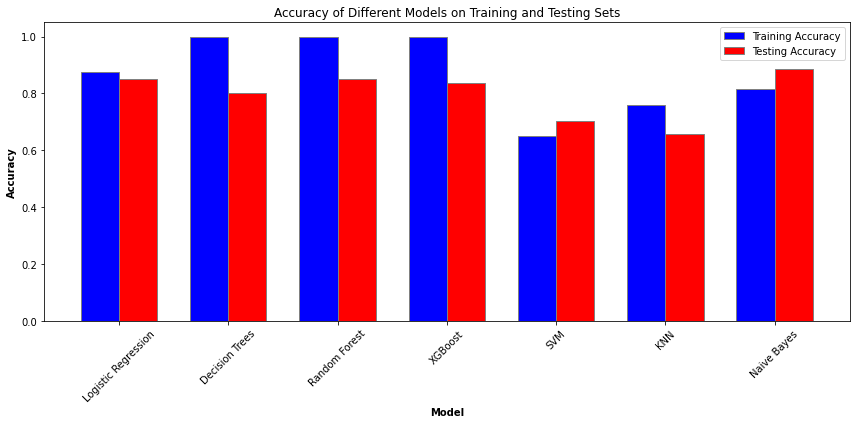

In [6]:
def plot_model_accuracy(results):
    # Extract model names, training accuracy, and testing accuracy
    model_names = list(results.keys())
    train_accuracy = [result['Training Accuracy'] for result in results.values()]
    test_accuracy = [result['Testing Accuracy'] for result in results.values()]

    # Set the width of the bars
    bar_width = 0.35

    # Set the position of the bars on the x-axis
    r1 = np.arange(len(model_names))
    r2 = [x + bar_width for x in r1]

    # Plot the bar graph
    plt.figure(figsize=(12, 6))
    plt.bar(r1, train_accuracy, color='b', width=bar_width, edgecolor='grey', label='Training Accuracy')
    plt.bar(r2, test_accuracy, color='r', width=bar_width, edgecolor='grey', label='Testing Accuracy')

    # Add labels and title
    plt.xlabel('Model', fontweight='bold')
    plt.ylabel('Accuracy', fontweight='bold')
    plt.xticks([r + bar_width/2 for r in range(len(model_names))], model_names, rotation=45)
    plt.title('Accuracy of Different Models on Training and Testing Sets')
    plt.legend()

    # Show plot
    plt.tight_layout()
    plt.show()

# Usage example:
# Assuming results is the dictionary returned by evaluate_models function
plot_model_accuracy(results)


### Hyperparameter tuning¶
- GridSearchCV

In [7]:
# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty norm
    'solver': ['liblinear', 'saga']  # Optimization algorithm
}

# Create the logistic regression model
model = LogisticRegression()

# Create the grid search object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score on Test Set:", accuracy)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter 

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy Score: 0.833843537414966


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


NameError: name 'y_pred' is not defined

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Just rounding them so the numbers are easier to read
cm = cm.round(2)


tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix of Heart Disease For Logistic Regression")
plt.xlabel('Predicted')
plt.ylabel('Actual')

print('true-negitive:', tn, 
      '\nfalse-positive:', fp, 
      '\nfalse-negative:', fn, 
      '\ntrue-positive:', tp )

In [ ]:
y_preds = grid_search.predict(X_test)

In [ ]:
from sklearn.metrics import roc_curve, auc

# Train logistic regression model with best parameters
logistic_model = LogisticRegression(**best_params)
logistic_model.fit(X_train, y_train)

# Predict probabilities for positive class
y_probs = logistic_model.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate area under ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

In [ ]:
grid_search.best_params_

In [ ]:
clf = LogisticRegression(C=0.1,
                        solver="liblinear", penalty='l2')

In [ ]:
#Cross validated accuracy
cv_acc= cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring="accuracy")
cv_acc

In [ ]:
cv_acc = np.mean(cv_acc)
cv_acc

In [ ]:
cv_precision= cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

In [ ]:
cv_recall= cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

In [ ]:
cv_f1= cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

In [ ]:
#Visualise cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

In [ ]:
clf = LogisticRegression(C=0.1,
                        solver="liblinear", penalty='l2')

clf.fit(X_train,y_train);

In [ ]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False)

In [ ]:
# Base on the visualisation,
# chest pain type(cp)
# resting electrocardiographic results(restecg)
# slope of the peak exercise ST segment(slope)
# have strong feature importance

To address this issue, it's essential to interpret the results of grid search and cross-validation in conjunction with each other. While grid search helps in selecting the optimal hyperparameters for a model based on a specific dataset or subset, cross-validation provides a more reliable estimate of the model's generalization ability across different data partitions. It's essential to consider both results when assessing the overall performance and robustness of the model. Additionally, further investigation into the specific characteristics of the data and model behavior can help in understanding the observed differences in accuracy scores.

In [ ]:
# testing it out for one model now doing it for the rest but feature importance should be for the best model

In [ ]:
# Define the decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation to find the best parameters
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)

# Train the decision tree classifier with the best parameters
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = best_dt_classifier.predict(X_test)

# Evaluate the model on the testing set - how well the model generalizes to unseen data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score on Test Set:", accuracy)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Just rounding them so the numbers are easier to read
cm = cm.round(2)


tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix of Heart Disease For DT")
plt.xlabel('Predicted')
plt.ylabel('Actual')

print('true-negitive:', tn, 
      '\nfalse-positive:', fp, 
      '\nfalse-negative:', fn, 
      '\ntrue-positive:', tp )

In [ ]:
y_preds = grid_search.predict(X_test)

# Train DecisionTreeClassifier model with best parameters
descision_tree_model = DecisionTreeClassifier(**best_params)
descision_tree_model.fit(X_train, y_train)

# Predict probabilities for positive class
y_probs = descision_tree_model.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate area under ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve For DT')
plt.legend(loc='lower right')
plt.show()


In [ ]:
print(classification_report(y_test,y_preds))

In [ ]:
grid_search.best_params_

In [ ]:
clf = DecisionTreeClassifier(criterion='gini',
                        min_samples_leaf=4, min_samples_split=2, max_depth = 5)

In [ ]:
# Define the scoring metrics
scoring_metrics = ["accuracy", "precision", "recall", "f1"]

# Initialize dictionary to store cross-validated scores
cv_scores = {}

# Perform cross-validation for each scoring metric
for metric in scoring_metrics:
    # Compute cross-validated scores
    cv_scores[metric] = np.mean(cross_val_score(clf, X, y, cv=5, scoring=metric))

# Print the cross-validated scores
for metric, score in cv_scores.items():
    print(f"Cross-validated {metric.capitalize()}: {score:.2f}")


In [ ]:
# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation to find the best parameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)

# Train the Random Forest classifier with the best parameters
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score on Test Set:", accuracy)


In [ ]:
y_preds = grid_search.predict(X_test)

# Train RandomForestClassifier model with best parameters
random_forest_model = RandomForestClassifier(**best_params)
random_forest_model.fit(X_train, y_train)

# Predict probabilities for positive class
y_probs = random_forest_model.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate area under ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve For RF')
plt.legend(loc='lower right')
plt.show()


In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Just rounding them so the numbers are easier to read
cm = cm.round(2)


tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix of Heart Disease For RF")
plt.xlabel('Predicted')
plt.ylabel('Actual')

print('true-negitive:', tn, 
      '\nfalse-positive:', fp, 
      '\nfalse-negative:', fn, 
      '\ntrue-positive:', tp )

In [ ]:
print(classification_report(y_test,y_preds))

In [ ]:
clf = RandomForestClassifier(max_depth= None,
                        min_samples_leaf=1, min_samples_split=5, n_estimators = 100)

In [ ]:
# Define the scoring metrics
scoring_metrics = ["accuracy", "precision", "recall", "f1"]

# Initialize dictionary to store cross-validated scores
cv_scores = {}

# Perform cross-validation for each scoring metric
for metric in scoring_metrics:
    # Compute cross-validated scores
    cv_scores[metric] = np.mean(cross_val_score(clf, X, y, cv=5, scoring=metric))

# Print the cross-validated scores
for metric, score in cv_scores.items():
    print(f"Cross-validated {metric.capitalize()}: {score:.2f}")


In [ ]:
# Define the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Perform grid search with cross-validation to find the best parameters
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params_xgb = grid_search.best_params_
best_score_xgb = grid_search.best_score_

print("Best Parameters (XGBoost):", best_params_xgb)
print("Best Accuracy Score (XGBoost):", best_score_xgb)

# Train the XGBoost classifier with the best parameters
best_xgb_classifier = XGBClassifier(**best_params_xgb, random_state=42)
best_xgb_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred_xgb = best_xgb_classifier.predict(X_test)

# Evaluate the model on the testing set
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy Score on Test Set (XGBoost):", accuracy_xgb)

In [ ]:
y_preds = grid_search.predict(X_test)

# Train XGBClassifier model with best parameters
XGBClassifier_model = XGBClassifier(**best_params_xgb)
XGBClassifier_model.fit(X_train, y_train)

# Predict probabilities for positive class
y_probs = XGBClassifier_model.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate area under ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve For XGB')
plt.legend(loc='lower right')
plt.show()


In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Just rounding them so the numbers are easier to read
cm = cm.round(2)


tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix of Heart Disease For XGBoost")
plt.xlabel('Predicted')
plt.ylabel('Actual')

print('true-negitive:', tn, 
      '\nfalse-positive:', fp, 
      '\nfalse-negative:', fn, 
      '\ntrue-positive:', tp )

In [ ]:
print(classification_report(y_test,y_preds))

In [ ]:
clf = XGBClassifier(colsample_bytree= 0.8,
                        learning_rate=0.2, max_depth=5, n_estimators = 300,subsample = 1.0 )

In [ ]:
# Define the scoring metrics
scoring_metrics = ["accuracy", "precision", "recall", "f1"]

# Initialize dictionary to store cross-validated scores
cv_scores = {}

# Perform cross-validation for each scoring metric
for metric in scoring_metrics:
    # Compute cross-validated scores
    cv_scores[metric] = np.mean(cross_val_score(clf, X, y, cv=5, scoring=metric))

# Print the cross-validated scores
for metric, score in cv_scores.items():
    print(f"Cross-validated {metric.capitalize()}: {score:.2f}")


In [ ]:
# Define the K-Nearest Neighbors (KNN) classifier
knn_classifier = KNeighborsClassifier()

# Define a parameter grid for hyperparameter tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Perform grid search with cross-validation to find the best parameters
grid_search_knn = GridSearchCV(estimator=knn_classifier, param_grid=param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Get the best parameters and best score
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

print("Best Parameters (KNN):", best_params_knn)
print("Best Accuracy Score (KNN):", best_score_knn)

# Train the KNN classifier with the best parameters
best_knn_classifier = KNeighborsClassifier(**best_params_knn)
best_knn_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred_knn = best_knn_classifier.predict(X_test)

# Evaluate the model on the testing set
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy Score on Test Set (KNN):", accuracy_knn)


In [ ]:
y_preds = grid_search.predict(X_test)

# Train KNeighborsClassifier model with best parameters
KNeighborsClassifier_model = KNeighborsClassifier(**best_params_knn)
KNeighborsClassifier_model.fit(X_train, y_train)

# Predict probabilities for positive class
y_probs = KNeighborsClassifier_model.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate area under ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve For KNN')
plt.legend(loc='lower right')
plt.show()


In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Just rounding them so the numbers are easier to read
cm = cm.round(2)


tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix of Heart Disease For knn")
plt.xlabel('Predicted')
plt.ylabel('Actual')

print('true-negitive:', tn, 
      '\nfalse-positive:', fp, 
      '\nfalse-negative:', fn, 
      '\ntrue-positive:', tp )

In [ ]:
print(classification_report(y_test,y_preds))

In [ ]:
clf = XGBClassifier(n_neighbors=5,
                        p=1, weights='uniform')

In [ ]:
# Define the scoring metrics
scoring_metrics = ["accuracy", "precision", "recall", "f1"]

# Initialize dictionary to store cross-validated scores
cv_scores = {}

# Perform cross-validation for each scoring metric
for metric in scoring_metrics:
    # Compute cross-validated scores
    cv_scores[metric] = np.mean(cross_val_score(clf, X, y, cv=5, scoring=metric))

# Print the cross-validated scores
for metric, score in cv_scores.items():
    print(f"Cross-validated {metric.capitalize()}: {score:.2f}")


In [ ]:
# Define the Naive Bayes classifier
nb_classifier = GaussianNB()

# Define a parameter grid for hyperparameter tuning
param_grid_nb = {}

# Perform grid search with cross-validation to find the best parameters
grid_search_nb = GridSearchCV(estimator=nb_classifier, param_grid=param_grid_nb, cv=5, scoring='accuracy')
grid_search_nb.fit(X_train, y_train)

# Get the best parameters and best score
best_params_nb = grid_search_nb.best_params_
best_score_nb = grid_search_nb.best_score_

print("Best Parameters (Naive Bayes):", best_params_nb)
print("Best Accuracy Score (Naive Bayes):", best_score_nb)

# Train the Naive Bayes classifier with the best parameters
best_nb_classifier = GaussianNB(**best_params_nb)
best_nb_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred_nb = best_nb_classifier.predict(X_test)

# Evaluate the model on the testing set
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy Score on Test Set (Naive Bayes):", accuracy_nb)

In [ ]:
y_preds = grid_search.predict(X_test)

# Train GaussianNB model with best parameters
GaussianNB_model = GaussianNB(**best_params_nb)
GaussianNB_model.fit(X_train, y_train)

# Predict probabilities for positive class
y_probs = GaussianNB_model.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate area under ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve For NB')
plt.legend(loc='lower right')
plt.show()


In [ ]:
print(classification_report(y_test,y_preds))

In [ ]:
clf = GaussianNB()

In [ ]:
# Define the scoring metrics
scoring_metrics = ["accuracy", "precision", "recall", "f1"]

# Initialize dictionary to store cross-validated scores
cv_scores = {}

# Perform cross-validation for each scoring metric
for metric in scoring_metrics:
    # Compute cross-validated scores
    cv_scores[metric] = np.mean(cross_val_score(clf, X, y, cv=5, scoring=metric))

# Print the cross-validated scores
for metric, score in cv_scores.items():
    print(f"Cross-validated {metric.capitalize()}: {score:.2f}")
